In [61]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
load_dotenv()

df = pd.read_csv("../INPUT/df_analysis.csv") 

In [62]:
df

,Ticker,positive_sentiment,negative_sentiment,low_price,high_price
0,AAPL,461,373,332.58,356.56
1,ABBV,1,0,90.78,98.20
2,ABC,1,0,92.90,103.37
3,ABMD,1,0,236.35,260.45
4,ABT,4,0,87.05,92.40
...,...,...,...,...,...
178,WMB,2,0,17.48,19.93
179,WMT,9,11,117.01,120.30
180,WYNN,5,4,86.04,98.15
181,XOM,1,1,44.75,49.75


In [63]:
df2=df[df['Ticker'] == "AAPL"]

In [64]:
df2

,Ticker,positive_sentiment,negative_sentiment,low_price,high_price
0,AAPL,461,373,332.58,356.56


In [65]:
low = df2.iloc[0,3]
low

332.58

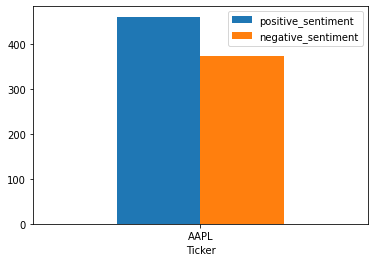

In [66]:
def plotSentiment(df):
    plot = df.groupby("Ticker").agg({"positive_sentiment": "sum","negative_sentiment":"sum"}).plot.bar(rot=0)
    fig = plot.get_figure()
    return plot
plotSentiment(df2)

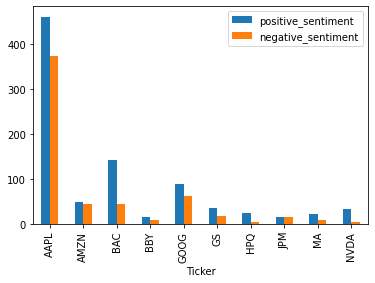

In [76]:
df3 = df.sort_values(by=['positive_sentiment'], ascending=False)
top5s=df3['Ticker'][0:10]

df_chart=df3[df3['Ticker'].isin(top5s)]
df_chart.groupby("Ticker").agg({"positive_sentiment": "sum","negative_sentiment":"sum"}).plot.bar()

In [78]:
df_perc=df_chart.groupby("Ticker").agg({"positive_sentiment": "sum","negative_sentiment":"sum"})

df_perc['positive_percentage']= (df_perc['positive_sentiment'] / (df_perc['positive_sentiment'] + df_perc['negative_sentiment']))*100
#plotting of the Fatality Percentage
#df_perc=df_perc.reset_index().sort_values("positive_percentage")

df_perc.groupby('Ticker').agg({"positive_perc": "sum"}).plot.bar()

SpecificationError: nested renamer is not supported

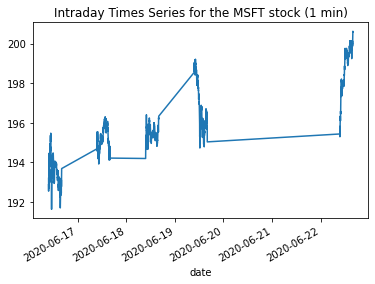

In [49]:


ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')
data1, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
data1['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()